<a href="https://colab.research.google.com/github/caiosilveiracw/lending-case/blob/main/lending_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Setting up Seaborn's style
sns.set(style="whitegrid")

# Function to load data
def load_data():
    # Loading CSV files
    from google.colab import files
    uploaded = files.upload()

    # Reading CSV files
    loans_data = pd.read_csv('loans.csv')
    clients_data = pd.read_csv('clients.csv')

    # Converting date columns
    loans_data['created_at'] = pd.to_datetime(loans_data['created_at'])
    clients_data['created_at'] = pd.to_datetime(clients_data['created_at'])
    clients_data['denied_at'] = pd.to_datetime(clients_data['denied_at'])

    # Adding year and month column to make "group by" easier
    loans_data['year_month'] = loans_data['created_at'].dt.to_period('M')
    return loans_data, clients_data

loans_data, clients_data = load_data()


Saving clients.csv to clients (1).csv
Saving loans.csv to loans (1).csv


<ipython-input-18-0158fbb67f13>:17: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  loans_data = pd.read_csv('loans.csv')


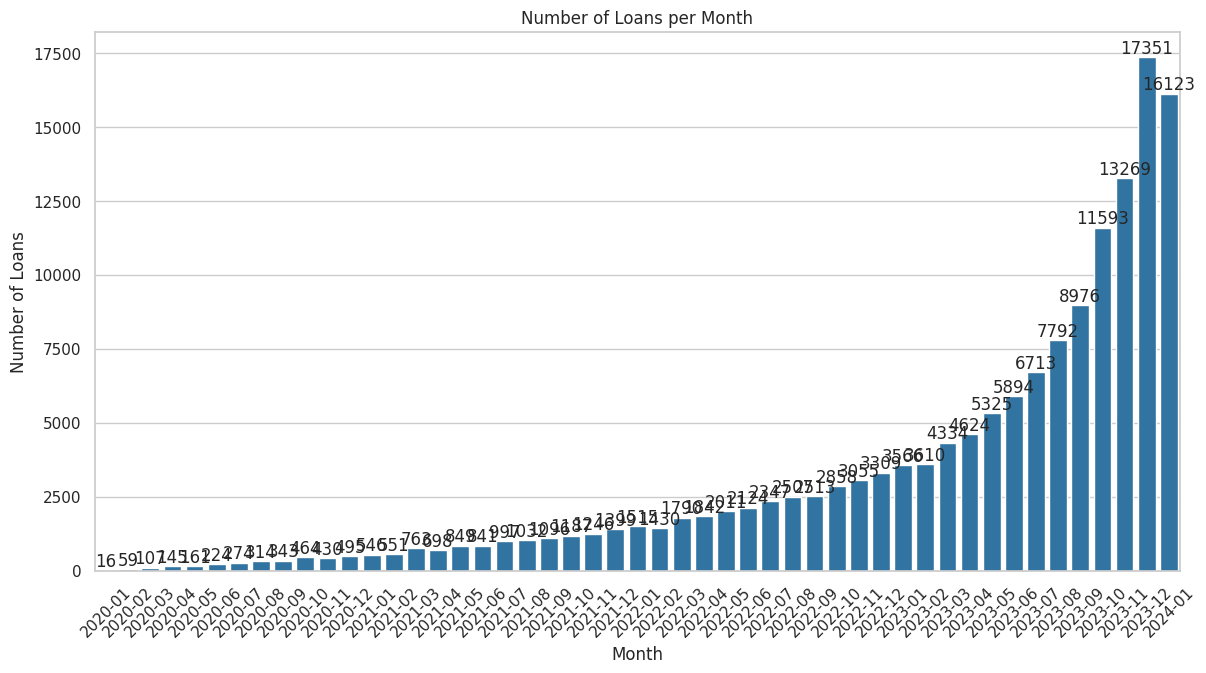

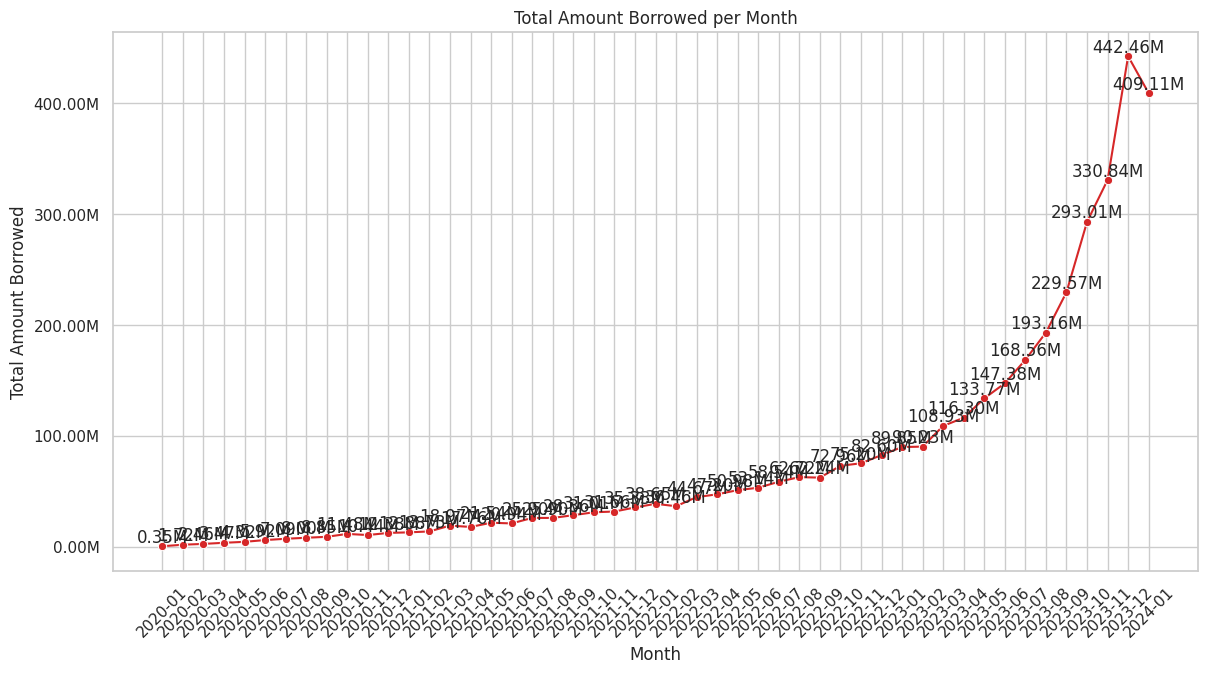

In [ ]:
# Best Month for Issuing Loans
monthly_loan_data = loans_data.groupby('year_month').agg(
    number_of_loans=('loan_id', 'count'),
    total_amount_borrowed=('loan_amount', 'sum')
).reset_index()

# Chart 1: Number of Loans per Month
plt.figure(figsize=(14, 7))
sns.barplot(x=monthly_loan_data['year_month'].astype(str), y=monthly_loan_data['number_of_loans'], color='tab:blue')
plt.xlabel('Month')
plt.ylabel('Number of Loans')
plt.title('Number of Loans per Month')
plt.xticks(rotation=45)
# Adding labels to bars
for index, value in enumerate(monthly_loan_data['number_of_loans']):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

# Importing function for Y-axis formatting
from matplotlib.ticker import FuncFormatter

# Function to format values in millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.2fM' % (x * 1e-6)

# Chart 2: Total Amount Borrowed per Month
plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_loan_data['year_month'].astype(str), y=monthly_loan_data['total_amount_borrowed'], color='tab:red', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Amount Borrowed')
plt.title('Total Amount Borrowed per Month')
plt.xticks(rotation=45)

# Applying formatting to the Y-axis
formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

# Adding labels to points
for index, value in enumerate(monthly_loan_data['total_amount_borrowed']):
    plt.text(index, value, f'{value * 1e-6:.2f}M', ha='center', va='bottom')

plt.show()


user_id                 0
loan_id                 0
created_at              0
due_at                  0
paid_at             53478
status                  0
loan_amount             0
tax                     0
due_amount              0
amount_paid             0
year_month              0
is_default              0
default_amount          0
payment_duration        0
interest_rate           0
dtype: int64


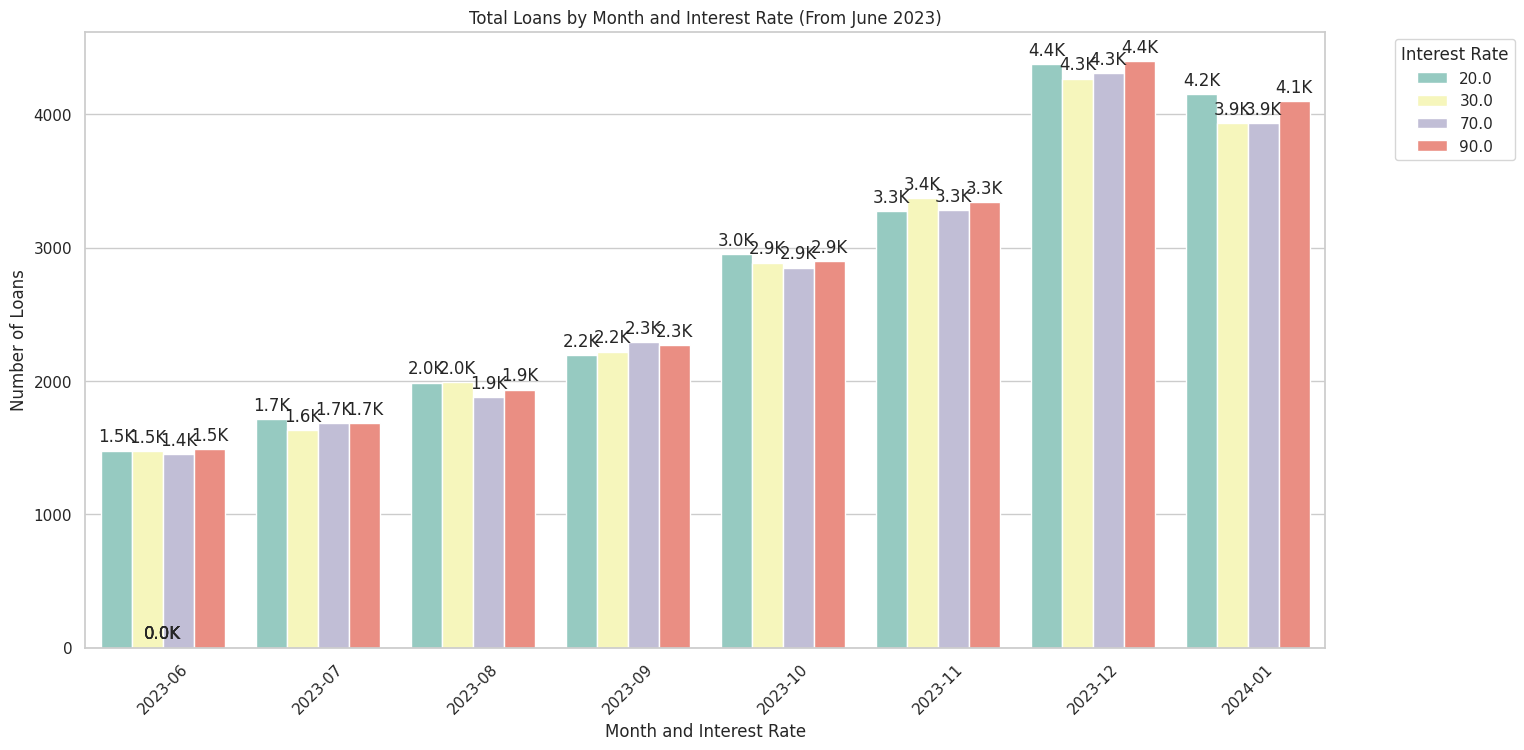

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `loans_data` and `clients_data` are already loaded and available

# Converting columns to datetime if necessary
loans_data['created_at'] = pd.to_datetime(loans_data['created_at'], errors='coerce')
clients_data['created_at'] = pd.to_datetime(clients_data['created_at'], errors='coerce')

# Ensuring 'interest_rate' is a numeric value
clients_data['interest_rate'] = pd.to_numeric(clients_data['interest_rate'], errors='coerce')

# Extracting year and month
loans_data['year_month'] = loans_data['created_at'].dt.to_period('M')

# Filtering to include only data from June 2023 onwards
filtered_loans_data = loans_data[loans_data['year_month'] >= '2023-06']

# Merging loan data with client data to get the interest rate
merged_data = filtered_loans_data.merge(clients_data[['user_id', 'interest_rate']], on='user_id', how='left')

# Checking for missing values after merging
print(merged_data.isnull().sum())

# Removing rows with missing 'interest_rate' or 'year_month'
merged_data = merged_data.dropna(subset=['interest_rate', 'year_month'])

# Ensuring 'year_month' is of type 'str' and 'interest_rate' is numeric
merged_data['year_month'] = merged_data['year_month'].astype(str)
merged_data['interest_rate'] = merged_data['interest_rate'].astype(float)

# Grouping by month and interest rate to get the count of loans
loans_by_interest_month = merged_data.groupby(['year_month', 'interest_rate']).agg(
    loan_count=('loan_id', 'count'),
    total_loan_amount=('loan_amount', 'sum')
).reset_index()

# Preparing the bar plot
plt.figure(figsize=(16, 8))
bar_plot = sns.barplot(data=loans_by_interest_month, x='year_month', y='loan_count', hue='interest_rate', palette='Set3')

# Customizing the plot
plt.xlabel('Month and Interest Rate')
plt.ylabel('Number of Loans')
plt.title('Total Loans by Month and Interest Rate (From June 2023)')
plt.xticks(rotation=45)
plt.legend(title='Interest Rate', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding labels to the bars in 'K' format
for p in bar_plot.patches:
    value = p.get_height()
    label = f'{value / 1e3:.1f}K'  # Formatting value in thousands (K)
    bar_plot.annotate(label,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 10),  # 10 points vertical offset
                      textcoords='offset points')

# Displaying the plot
plt.show()


user_id                 0
loan_id                 0
created_at              0
due_at                  0
paid_at             53478
status                  0
loan_amount             0
tax                     0
due_amount              0
amount_paid             0
year_month              0
is_default              0
default_amount          0
payment_duration        0
interest_rate           0
dtype: int64


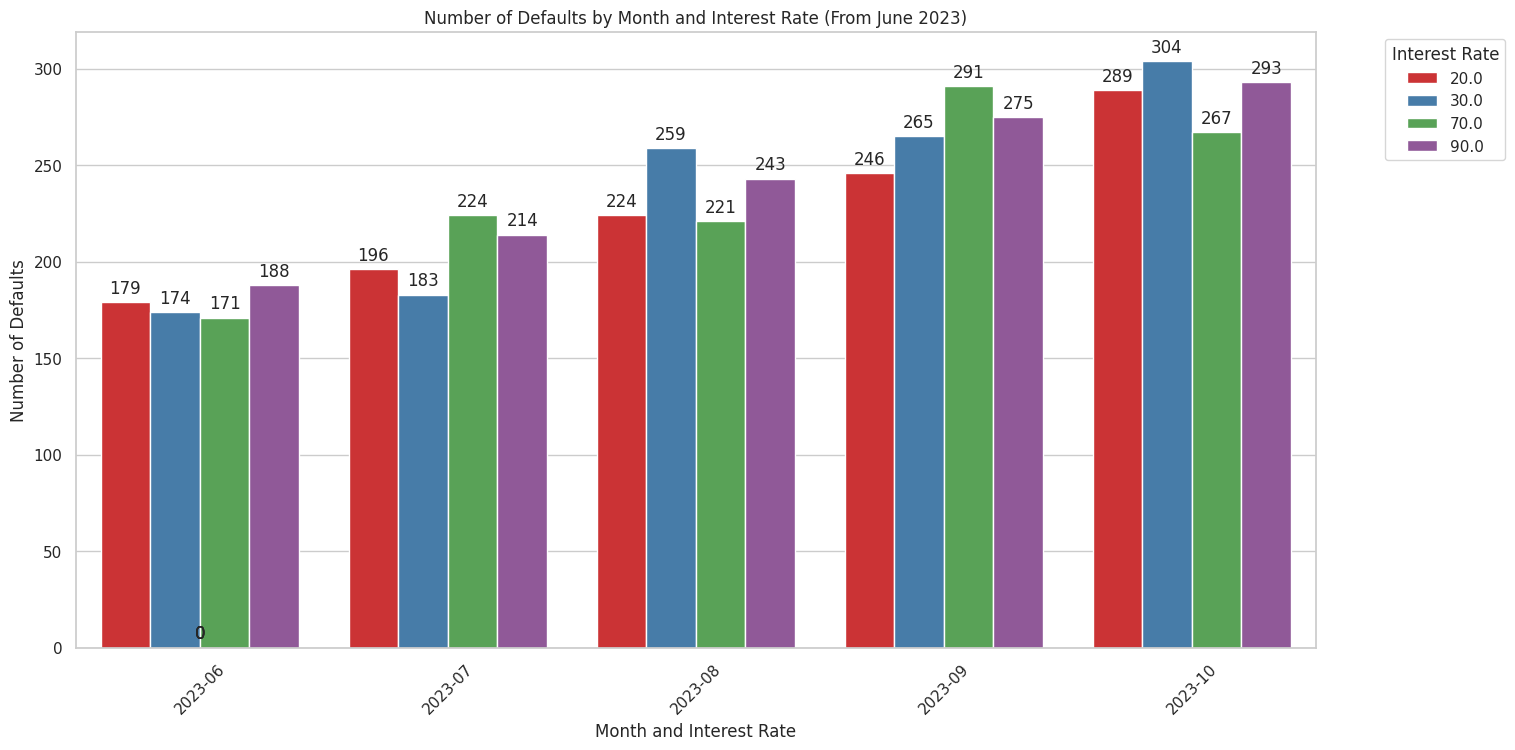

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `loans_data` and `clients_data` are already loaded and available

# Converting columns to datetime if necessary
loans_data['created_at'] = pd.to_datetime(loans_data['created_at'], errors='coerce')
clients_data['created_at'] = pd.to_datetime(clients_data['created_at'], errors='coerce')

# Ensuring 'interest_rate' is a numeric value
clients_data['interest_rate'] = pd.to_numeric(clients_data['interest_rate'], errors='coerce')

# Extracting year and month
loans_data['year_month'] = loans_data['created_at'].dt.to_period('M')

# Filtering to include only data from June 2023 onwards
filtered_loans_data = loans_data[loans_data['year_month'] >= '2023-06']

# Merging loan data with client data to get the interest rate
merged_data = filtered_loans_data.merge(clients_data[['user_id', 'interest_rate']], on='user_id', how='left')

# Checking for missing values after merging
print(merged_data.isnull().sum())

# Removing rows with missing 'interest_rate' or 'year_month'
merged_data = merged_data.dropna(subset=['interest_rate', 'year_month'])

# Ensuring 'year_month' is of type 'str' and 'interest_rate' is numeric
merged_data['year_month'] = merged_data['year_month'].astype(str)
merged_data['interest_rate'] = merged_data['interest_rate'].astype(float)

# Filtering for default cases only
default_cases = merged_data[merged_data['status'] == 'default']

# Grouping by month and interest rate to get the count of defaults
defaults_by_interest_month = default_cases.groupby(['year_month', 'interest_rate']).agg(
    default_count=('loan_id', 'count')
).reset_index()

# Preparing the bar plot
plt.figure(figsize=(16, 8))
bar_plot = sns.barplot(data=defaults_by_interest_month, x='year_month', y='default_count', hue='interest_rate', palette='Set1')

# Customizing the plot
plt.xlabel('Month and Interest Rate')
plt.ylabel('Number of Defaults')
plt.title('Number of Defaults by Month and Interest Rate (From June 2023)')
plt.xticks(rotation=45)
plt.legend(title='Interest Rate', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding labels to the bars in 'K' format
for p in bar_plot.patches:
    value = p.get_height()
    label = f'{value / 1e3:.1f}K' if value >= 1000 else f'{value:.0f}'  # Formatting value in thousands (K) if applicable
    bar_plot.annotate(label,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 10),  # 10 points vertical offset
                      textcoords='offset points')

# Displaying the plot
plt.show()


user_id                 0
loan_id                 0
created_at              0
due_at                  0
paid_at             53478
status                  0
loan_amount             0
tax                     0
due_amount              0
amount_paid             0
year_month              0
is_default              0
default_amount          0
payment_duration        0
interest_rate           0
dtype: int64


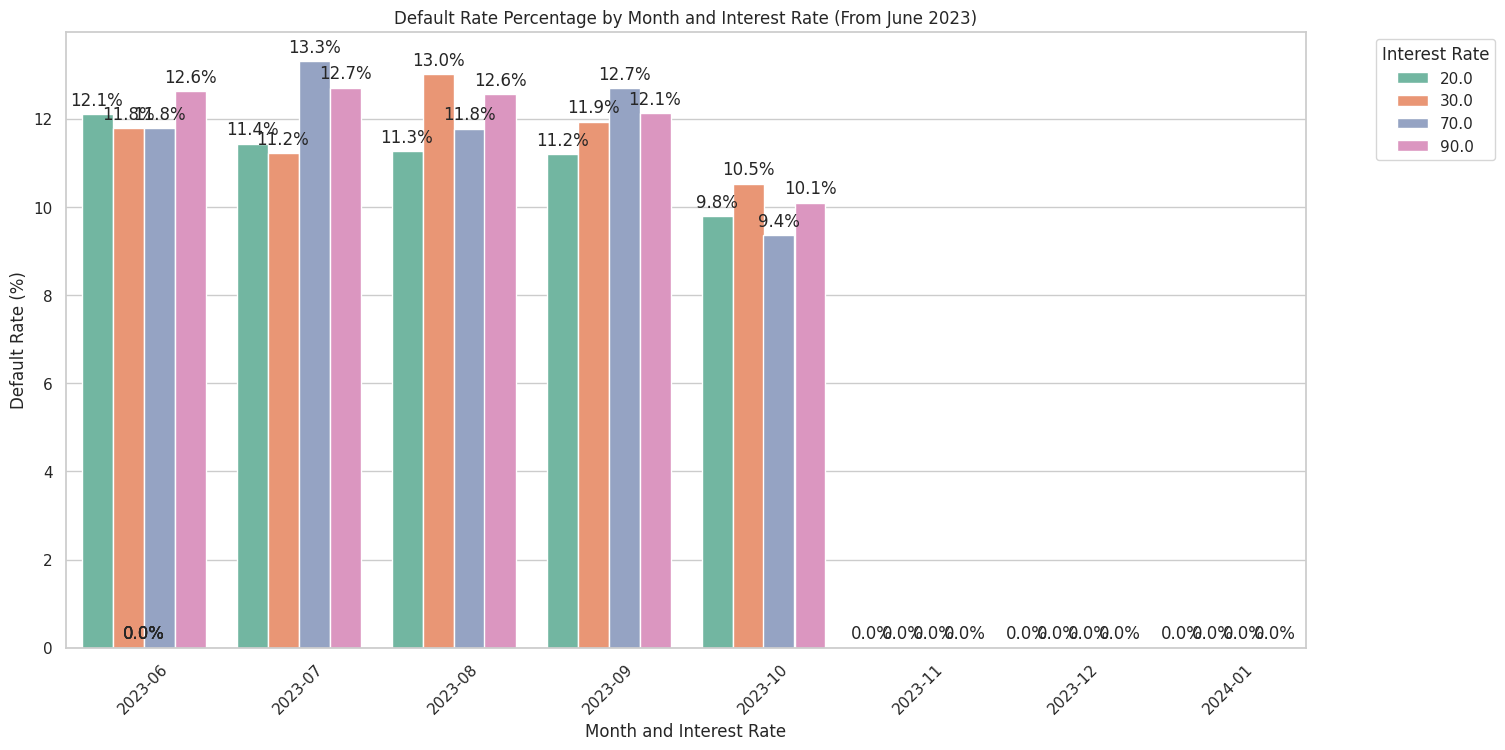

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `loans_data` and `clients_data` are already loaded and available

# Converting columns to datetime if necessary
loans_data['created_at'] = pd.to_datetime(loans_data['created_at'], errors='coerce')
clients_data['created_at'] = pd.to_datetime(clients_data['created_at'], errors='coerce')

# Ensuring 'interest_rate' is a numeric value
clients_data['interest_rate'] = pd.to_numeric(clients_data['interest_rate'], errors='coerce')

# Extracting year and month
loans_data['year_month'] = loans_data['created_at'].dt.to_period('M')

# Filtering to include only data from June 2023 onwards
filtered_loans_data = loans_data[loans_data['year_month'] >= '2023-06']

# Merging loan data with client data to get the interest rate
merged_data = filtered_loans_data.merge(clients_data[['user_id', 'interest_rate']], on='user_id', how='left')

# Checking for missing values after merging
print(merged_data.isnull().sum())

# Removing rows with missing 'interest_rate' or 'year_month'
merged_data = merged_data.dropna(subset=['interest_rate', 'year_month'])

# Ensuring 'year_month' is of type 'str' and 'interest_rate' is numeric
merged_data['year_month'] = merged_data['year_month'].astype(str)
merged_data['interest_rate'] = merged_data['interest_rate'].astype(float)

# Calculating the total number of loans per month and interest rate
total_loans_by_interest_month = merged_data.groupby(['year_month', 'interest_rate']).agg(
    total_loans=('loan_id', 'count')
).reset_index()

# Filtering for default cases only
default_cases = merged_data[merged_data['status'] == 'default']

# Calculating the number of defaults per month and interest rate
defaults_by_interest_month = default_cases.groupby(['year_month', 'interest_rate']).agg(
    default_count=('loan_id', 'count')
).reset_index()

# Merging total loans and defaults data
default_rate_data = pd.merge(total_loans_by_interest_month, defaults_by_interest_month,
                             on=['year_month', 'interest_rate'], how='left')

# Filling NaN values in default_count with 0
default_rate_data['default_count'] = default_rate_data['default_count'].fillna(0)

# Calculating default rate
default_rate_data['default_rate'] = (default_rate_data['default_count'] / default_rate_data['total_loans']) * 100

# Preparing the bar plot for default rate percentage
plt.figure(figsize=(16, 8))
bar_plot = sns.barplot(data=default_rate_data, x='year_month', y='default_rate', hue='interest_rate', palette='Set2')

# Customizing the plot
plt.xlabel('Month and Interest Rate')
plt.ylabel('Default Rate (%)')
plt.title('Default Rate Percentage by Month and Interest Rate (From June 2023)')
plt.xticks(rotation=45)
plt.legend(title='Interest Rate', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding percentage labels to the bars
for p in bar_plot.patches:
    value = p.get_height()
    label = f'{value:.1f}%'  # Formatting value as percentage with one decimal place
    bar_plot.annotate(label,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 10),  # 10 points vertical offset
                      textcoords='offset points')

# Displaying the plot
plt.show()


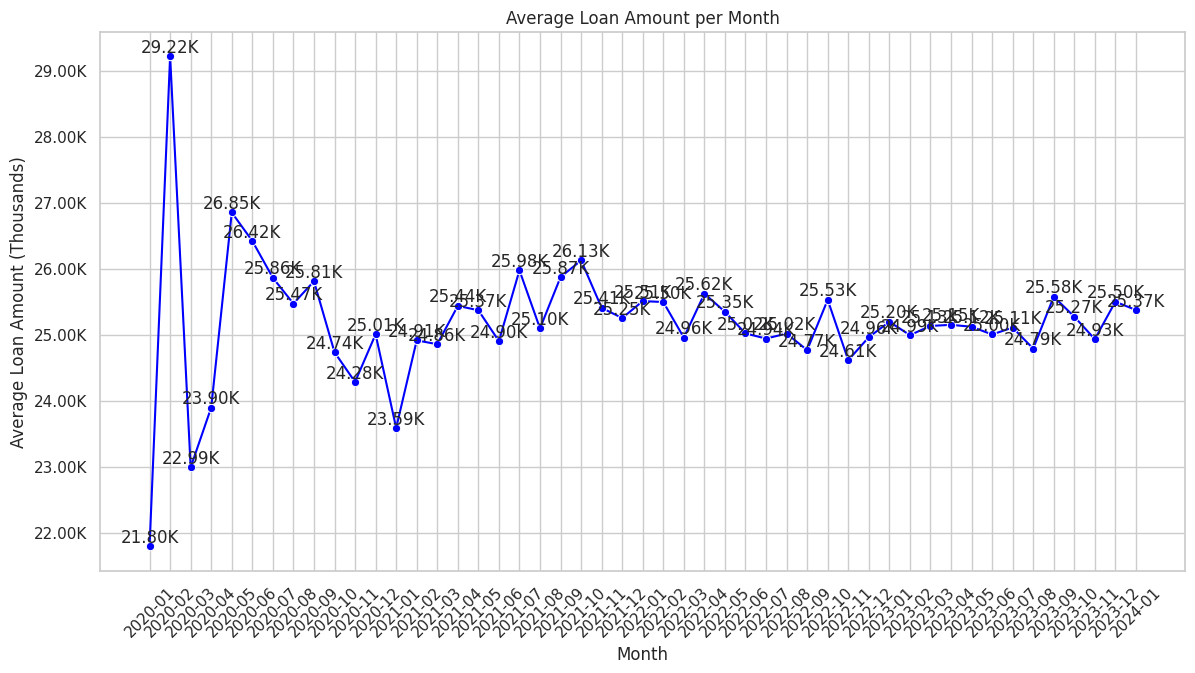

In [ ]:
# Average Loan Amount per Month

# Calculating the average loan amount per month
monthly_loan_data = loans_data.groupby('year_month').agg(
    total_loan_amount=('loan_amount', 'sum'),
    number_of_loans=('loan_id', 'count')
).reset_index()
monthly_loan_data['mean_loan_amount'] = monthly_loan_data['total_loan_amount'] / monthly_loan_data['number_of_loans']

# Function to format values in thousands
def thousands(x, pos):
    return '%1.2fK' % (x * 1e-3)

# Plotting the results
plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_loan_data['year_month'].astype(str), y=monthly_loan_data['mean_loan_amount'], marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Average Loan Amount (Thousands)')
plt.title('Average Loan Amount per Month')
plt.xticks(rotation=45)

# Applying formatting to the Y-axis
formatter = FuncFormatter(thousands)
plt.gca().yaxis.set_major_formatter(formatter)

# Adding labels to points
for index, value in enumerate(monthly_loan_data['mean_loan_amount']):
    plt.text(index, value, f'{value * 1e-3:.2f}K', ha='center', va='bottom')

plt.show()


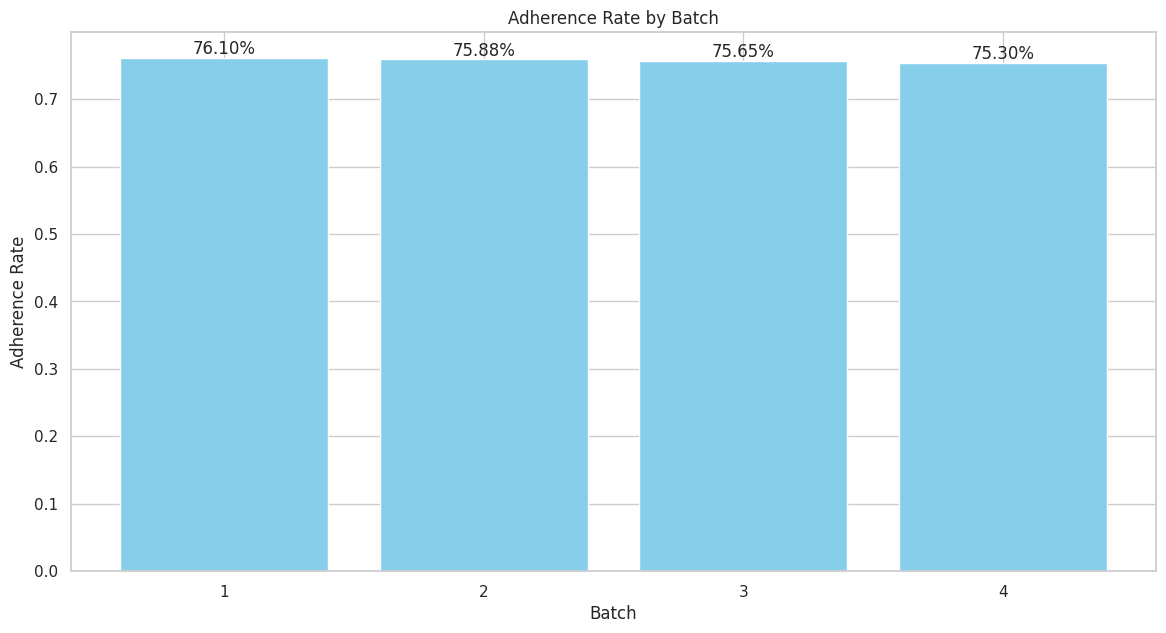

In [ ]:
# Best Batch in Terms of Adherence

# Filter approved clients
approved_clients = clients_data[clients_data['status'] == 'approved']

# Group approved clients by batch
batch_adhesion = approved_clients.groupby('batch').agg(
    total_clients=('user_id', 'count')
).reset_index()

# Filter loans taken by approved clients
loaned_clients = loans_data[loans_data['user_id'].isin(approved_clients['user_id'])]

# Count approved clients who took loans by batch
loaned_clients_by_batch = loaned_clients.merge(approved_clients[['user_id', 'batch']], on='user_id', how='left')
loaned_clients_count = loaned_clients_by_batch.groupby('batch').agg(
    clients_with_loans=('user_id', 'nunique')  # Count unique clients who took loans
).reset_index()

# Merge data of approved clients with data of clients who took loans
batch_adhesion = batch_adhesion.merge(loaned_clients_count, on='batch', how='left')
batch_adhesion['clients_with_loans'].fillna(0, inplace=True)  # Replace NaN with 0 for batches with no loans
batch_adhesion['adhesion_rate'] = batch_adhesion['clients_with_loans'] / batch_adhesion['total_clients']

# Plotting the results
plt.figure(figsize=(14, 7))
bars = plt.bar(batch_adhesion['batch'], batch_adhesion['adhesion_rate'], color='skyblue')
plt.xlabel('Batch')
plt.ylabel('Adherence Rate')
plt.title('Adherence Rate by Batch')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Set X-axis to show only integers

# Adding labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom')

plt.show()


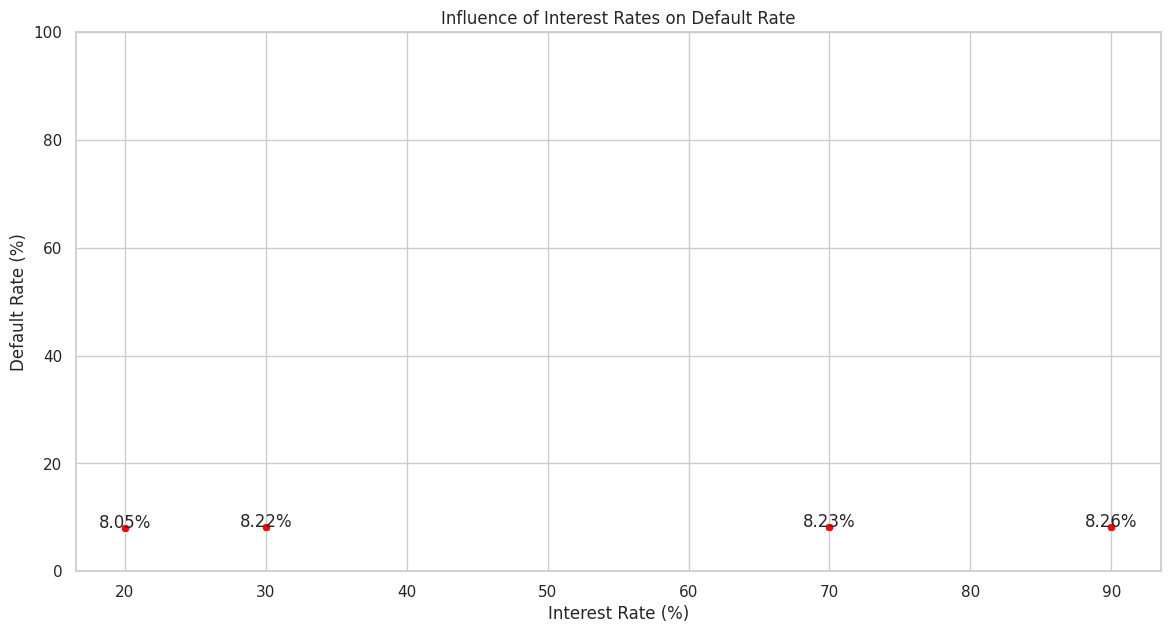

In [ ]:
# Influence of Interest Rates on Default

# Adding a column to indicate default
loans_data['is_default'] = loans_data['status'] == 'default'

# Calculating the default rate by interest rate
clients_loans = loans_data.merge(clients_data[['user_id', 'interest_rate']], on='user_id', how='left')
interest_default_rate = clients_loans.groupby('interest_rate').agg(
    total_loans=('loan_id', 'count'),
    default_loans=('is_default', 'sum')
).reset_index()
interest_default_rate['default_rate'] = interest_default_rate['default_loans'] / interest_default_rate['total_loans'] * 100  # Converting to percentage

# Plotting the results
plt.figure(figsize=(14, 7))
sns.scatterplot(x=interest_default_rate['interest_rate'], y=interest_default_rate['default_rate'], color='red')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Default Rate (%)')
plt.title('Influence of Interest Rates on Default Rate')
plt.ylim(0, 100)  # Setting Y-axis limits from 0 to 100%

# Adding labels to points
for i, txt in enumerate(interest_default_rate['default_rate']):
    plt.annotate(f'{txt:.2f}%', (interest_default_rate['interest_rate'][i], interest_default_rate['default_rate'][i]), ha='center')

plt.show()


<ipython-input-7-5a47d5f4d03a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_loan_by_batch['batch'], y=mean_loan_by_batch['mean_loan_amount'], palette='Greens_d')


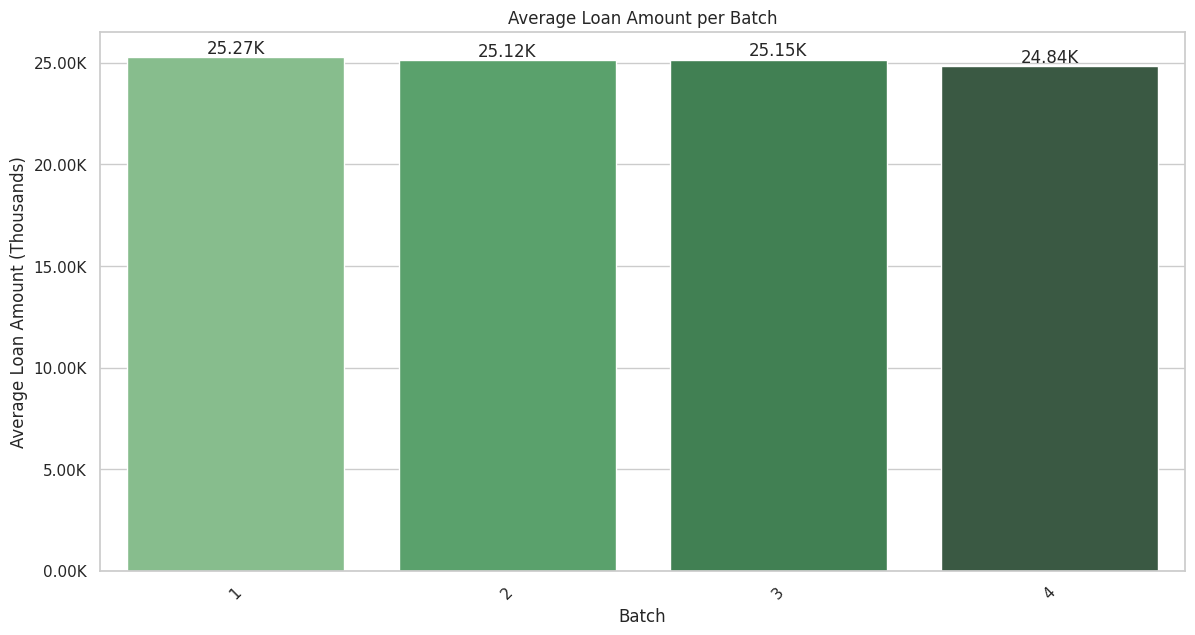

In [ ]:
# Average Loan Amount per Batch

# Calculating the average loan amount per batch
loan_by_batch = loans_data.merge(clients_data[['user_id', 'batch']], on='user_id', how='left')
mean_loan_by_batch = loan_by_batch.groupby('batch').agg(
    mean_loan_amount=('loan_amount', 'mean')
).reset_index()

# Function to format values in thousands
def thousands(x, pos):
    return '%1.2fK' % (x * 1e-3)

# Plotting the results
plt.figure(figsize=(14, 7))
sns.barplot(x=mean_loan_by_batch['batch'], y=mean_loan_by_batch['mean_loan_amount'], palette='Greens_d')
plt.xlabel('Batch')
plt.ylabel('Average Loan Amount (Thousands)')
plt.title('Average Loan Amount per Batch')
plt.xticks(rotation=45)

# Applying formatting to the Y-axis
formatter = FuncFormatter(thousands)
plt.gca().yaxis.set_major_formatter(formatter)

# Adding labels to bars
for index, value in enumerate(mean_loan_by_batch['mean_loan_amount']):
    plt.text(index, value, f'{value * 1e-3:.2f}K', ha='center', va='bottom')

plt.show()


<ipython-input-10-4753a867ffbe>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_loan_by_interest['interest_rate'], y=mean_loan_by_interest['mean_loan_amount'], palette='Blues_d')


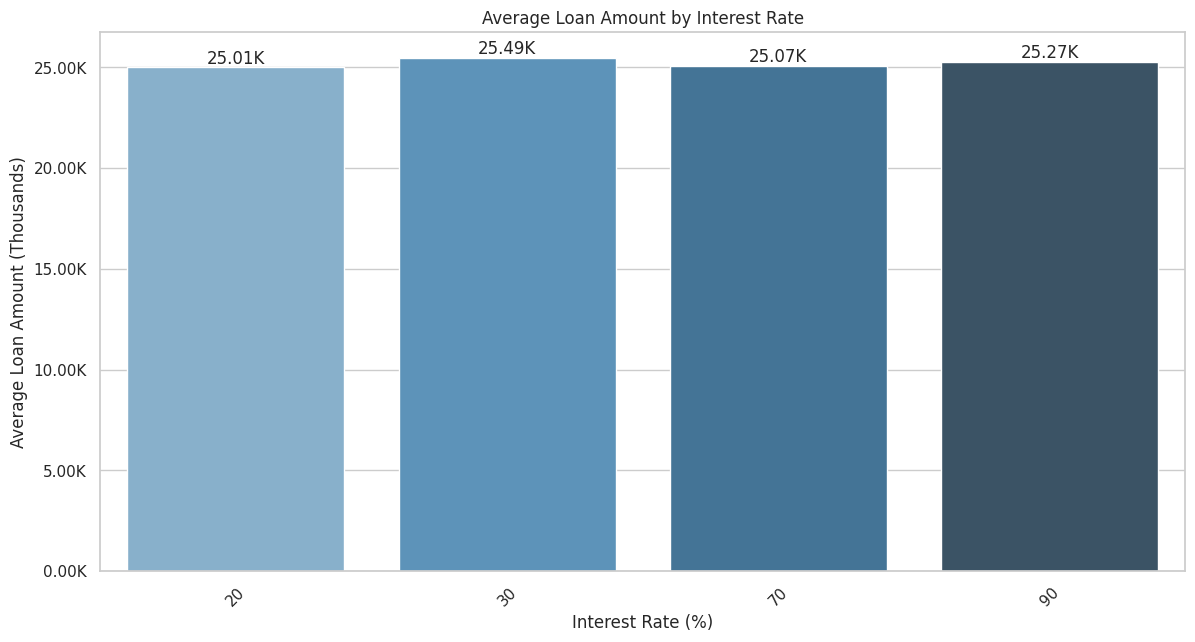

In [ ]:
# Average Loan Amount by Interest Rate

# Calculating the average loan amount by interest rate
mean_loan_by_interest = loans_data.merge(clients_data[['user_id', 'interest_rate']], on='user_id', how='left')
mean_loan_by_interest = mean_loan_by_interest.groupby('interest_rate').agg(
    mean_loan_amount=('loan_amount', 'mean')
).reset_index()

# Function to format values in thousands
def thousands(x, pos):
    return '%1.2fK' % (x * 1e-3)

# Plotting the results
plt.figure(figsize=(14, 7))
sns.barplot(x=mean_loan_by_interest['interest_rate'], y=mean_loan_by_interest['mean_loan_amount'], palette='Blues_d')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Average Loan Amount (Thousands)')
plt.title('Average Loan Amount by Interest Rate')
plt.xticks(rotation=45)

# Applying formatting to the Y-axis
formatter = FuncFormatter(thousands)
plt.gca().yaxis.set_major_formatter(formatter)

# Adding labels to bars
for index, value in enumerate(mean_loan_by_interest['mean_loan_amount']):
    plt.text(index, value, f'{value * 1e-3:.2f}K', ha='center', va='bottom')

plt.show()


In [ ]:
# Customer Ranking (Top 10 Best and Worst)

# Adding a column for defaults
loans_data['is_default'] = loans_data['status'] == 'default'

# Calculating the outstanding amount for defaulted loans
loans_data['default_amount'] = loans_data.apply(
    lambda row: row['due_amount'] - row['amount_paid'] if row['is_default'] else 0, axis=1)

# Grouping customer data
clients_loan_summary = loans_data.groupby('user_id').agg(
    total_loan_amount=('loan_amount', 'sum'),
    total_amount_paid=('amount_paid', 'sum'),
    total_default_amount=('default_amount', 'sum')  # Outstanding amount if in default
).reset_index()

# Ranking the best clients (based on the total amount of loans paid)
best_clients = clients_loan_summary.sort_values(by='total_amount_paid', ascending=False).head(10)

# Ranking the worst clients (based on the outstanding amount of unpaid loans)
worst_clients = clients_loan_summary[clients_loan_summary['total_default_amount'] > 0].sort_values(by='total_default_amount', ascending=False).head(10)

print("Top 10 Best Clients:")
print(best_clients)
print("\nTop 10 Worst Clients:")
print(worst_clients)


Top 10 Best Clients:
       user_id  total_loan_amount  total_amount_paid  total_default_amount
60772    77087             513365          613098.35                   0.0
34819    44244             415316          499319.42                   0.0
48104    61144             452933          467963.71                   0.0
17708    22476             399699          446963.71                   0.0
22618    28742             386203          443752.85                   0.0
9276     11773             412470          439352.04                   0.0
29358    37345             418302          428164.32                   0.0
13614    17335             354517          428022.92                   0.0
5842      7429             411035          426986.42                   0.0
30223    38452             414343          422518.65                   0.0

Top 10 Worst Clients:
       user_id  total_loan_amount  total_amount_paid  total_default_amount
52685    66899              96486            3345.00    

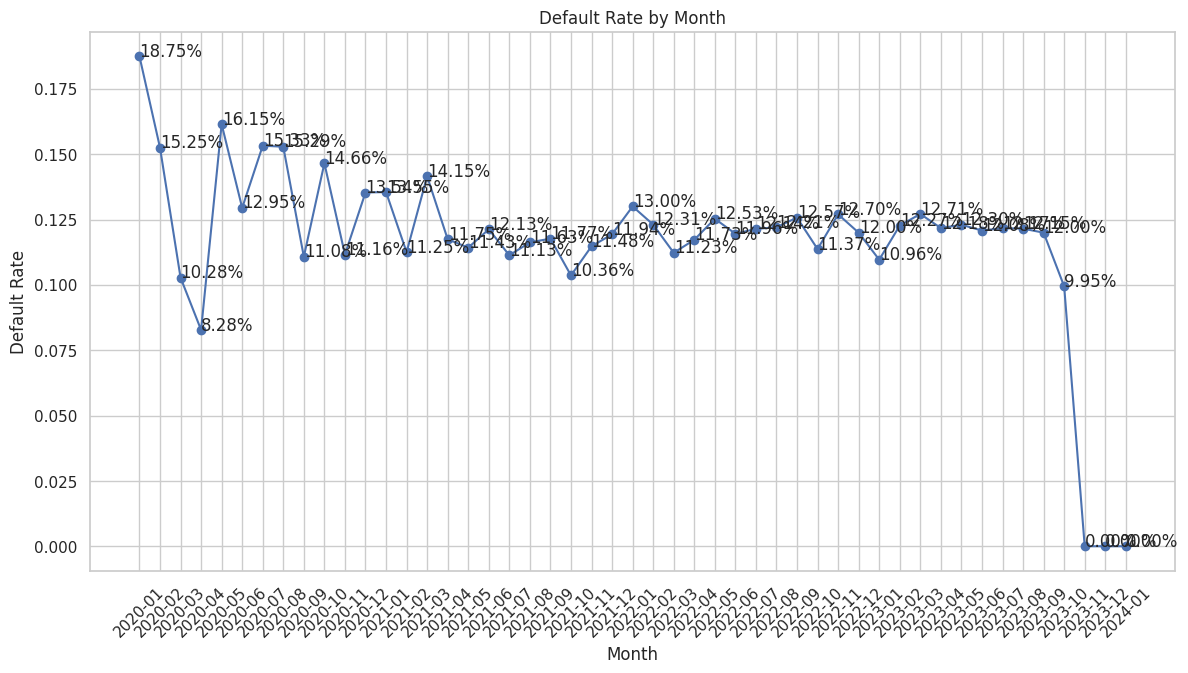

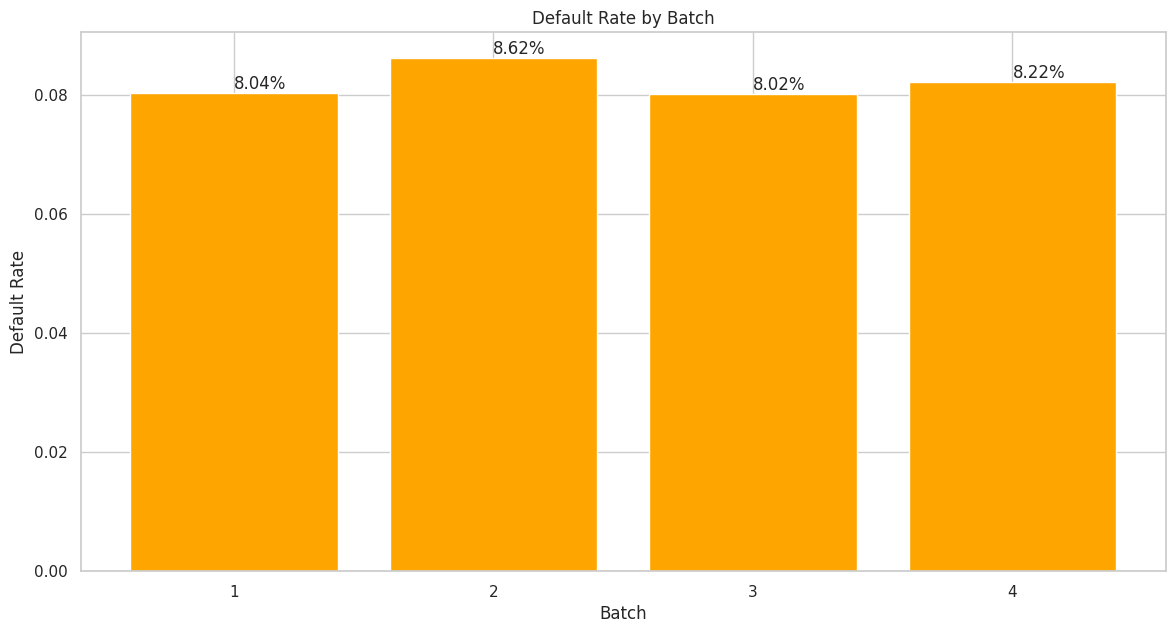

In [ ]:
# Default Rate by Month and Batch

# Calculating the default rate by month
monthly_default_rate = loans_data.groupby('year_month').agg(
    total_loans=('loan_id', 'count'),
    default_loans=('is_default', 'sum')
).reset_index()
monthly_default_rate['default_rate'] = monthly_default_rate['default_loans'] / monthly_default_rate['total_loans']

# Merging loans data with batch information from clients
clients_loans_by_batch = loans_data.merge(clients_data[['user_id', 'batch']], on='user_id', how='left')

# Calculating the default rate by batch
batch_default_rate = clients_loans_by_batch.groupby('batch').agg(
    total_loans=('loan_id', 'count'),
    default_loans=('is_default', 'sum')
).reset_index()
batch_default_rate['default_rate'] = batch_default_rate['default_loans'] / batch_default_rate['total_loans']

# Plotting Default Rate by Month
plt.figure(figsize=(14, 7))
plt.plot(monthly_default_rate['year_month'].astype(str), monthly_default_rate['default_rate'], marker='o')
plt.xlabel('Month')
plt.ylabel('Default Rate')
plt.title('Default Rate by Month')
plt.xticks(rotation=45)

# Adding labels to points
for i, txt in enumerate(monthly_default_rate['default_rate']):
    plt.annotate(f'{txt:.2%}', (monthly_default_rate['year_month'][i].strftime('%Y-%m'), txt))

plt.show()

# Plotting Default Rate by Batch
plt.figure(figsize=(14, 7))
bars = plt.bar(batch_default_rate['batch'], batch_default_rate['default_rate'], color='orange')
plt.xlabel('Batch')
plt.ylabel('Default Rate')
plt.title('Default Rate by Batch')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Setting X-axis to show only integers

# Adding labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', va='bottom')

plt.show()


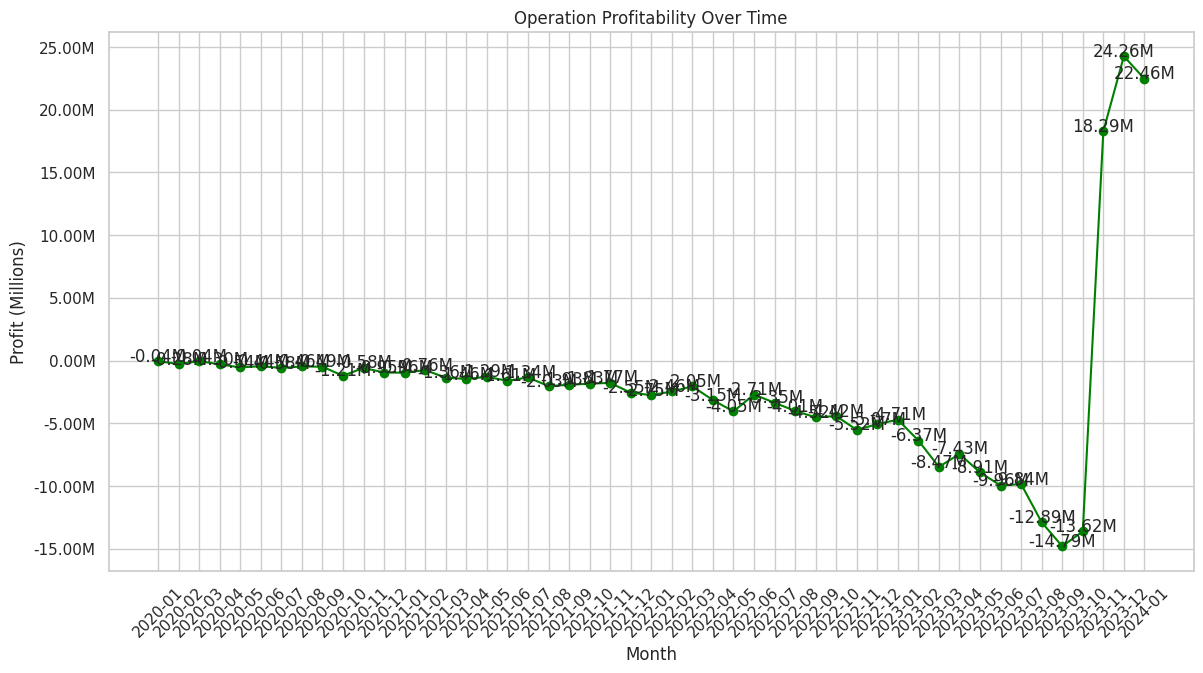

In [ ]:
# Calculating interest revenue and default losses
clients_loans['interest_received'] = clients_loans['tax'] + ((clients_loans['loan_amount'] * clients_loans['interest_rate'] / 100) / 12)
clients_loans['default_loss'] = clients_loans['is_default'] * clients_loans['loan_amount']

# Grouping by month to calculate profit
monthly_profit = clients_loans.groupby('year_month').agg(
    total_interest_received=('interest_received', 'sum'),
    total_default_loss=('default_loss', 'sum')
).reset_index()
monthly_profit['profit'] = monthly_profit['total_interest_received'] - monthly_profit['total_default_loss']

# Function to format values in millions
def millions(x, pos):
    return '%1.2fM' % (x * 1e-6)

# Plotting the results with values in millions
plt.figure(figsize=(14, 7))
plt.plot(monthly_profit['year_month'].astype(str), monthly_profit['profit'], marker='o', color='green')
plt.xlabel('Month')
plt.ylabel('Profit (Millions)')
plt.title('Operation Profitability Over Time')
plt.xticks(rotation=45)

# Applying formatting to the Y-axis
formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

# Adding labels to points
for i, txt in enumerate(monthly_profit['profit']):
    plt.annotate(f'{txt * 1e-6:.2f}M', (monthly_profit['year_month'][i].strftime('%Y-%m'), txt), ha='center')

plt.show()


In [22]:
import pandas as pd

# Assuming `loans_data` and `clients_data` are already loaded and available

# Converting columns to datetime if necessary
loans_data['created_at'] = pd.to_datetime(loans_data['created_at'], errors='coerce')
clients_data['created_at'] = pd.to_datetime(clients_data['created_at'], errors='coerce')

# Ensuring 'interest_rate' is a numeric value
clients_data['interest_rate'] = pd.to_numeric(clients_data['interest_rate'], errors='coerce')

# Extracting year and month
loans_data['year_month'] = loans_data['created_at'].dt.to_period('M')

# Filtering to include only data from June 2023 onwards
filtered_loans_data = loans_data[loans_data['year_month'] >= '2023-06']

# Merging loan data with client data to get the interest rate and other necessary details
clients_loans = filtered_loans_data.merge(clients_data[['user_id', 'interest_rate']], on='user_id', how='left')

# Checking for missing values after merging
print(clients_loans.isnull().sum())

# Removing rows with missing 'interest_rate' or 'year_month'
clients_loans = clients_loans.dropna(subset=['interest_rate', 'year_month'])

# Ensuring 'year_month' is of type 'str' and 'interest_rate' is numeric
clients_loans['year_month'] = clients_loans['year_month'].astype(str)
clients_loans['interest_rate'] = clients_loans['interest_rate'].astype(float)

# Adding a column to identify defaulted loans
clients_loans['is_default'] = clients_loans['status'].apply(lambda x: x == 'default')

# Calculating interest received (monthly interest portion + tax)
clients_loans['interest_received'] = clients_loans['tax'] + ((clients_loans['loan_amount'] * clients_loans['interest_rate'] / 100) / 12)

# Calculating default loss (if defaulted, full loan amount is considered lost)
clients_loans['default_loss'] = clients_loans['is_default'] * clients_loans['loan_amount']

# Aggregating data to get total interest received and total default losses
total_interest_received = clients_loans['interest_received'].sum()
total_default_loss = clients_loans['default_loss'].sum()

# Calculating the final balance (profit or loss)
final_balance = total_interest_received - total_default_loss

# Determining the financial status (profit or loss)
financial_status = "profit" if final_balance >= 0 else "loss"

# Printing the results
print(f"Total Interest Received: ${total_interest_received:,.2f}")
print(f"Total Default Loss: ${total_default_loss:,.2f}")
print(f"Final Balance: ${final_balance:,.2f}")
print(f"Current Financial Status: {financial_status.capitalize()}")

# Returning the final balance and financial status
result = {
    "total_interest_received": total_interest_received,
    "total_default_loss": total_default_loss,
    "final_balance": final_balance,
    "financial_status": financial_status
}

result


user_id              0
loan_id              0
created_at           0
due_at               0
paid_at          53478
status               0
loan_amount          0
tax                  0
due_amount           0
amount_paid          0
year_month           0
interest_rate        0
dtype: int64
Total Interest Received: $121,597,771.30
Total Default Loss: $117,681,478.00
Final Balance: $3,916,293.30
Current Financial Status: Profit


{'total_interest_received': 121597771.30000001,
 'total_default_loss': 117681478,
 'final_balance': 3916293.300000012,
 'financial_status': 'profit'}